# STEP 1 : Importing all the required libraries 

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from joblib import dump, load 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## STEP2 : Data loading and inital inspection 

In [51]:
data = pd.read_csv('D:\RAHUL\House price prediction\Dataset\Hyderbad_House_price.csv')

# Initial inspection
print(f"Dataset shape: {data.shape}")
print("\nFirst 5 rows:")
display(data.head())
print("\nData types and missing values:")
print(data.info())
print("\nDescriptive statistics:")
display(data.describe())



Dataset shape: (3660, 7)

First 5 rows:


,Unnamed: 0,title,location,price(L),rate_persqft,area_insqft,building_status
0,0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3660 non-null   int64  
 1   title            3660 non-null   object 
 2   location         3660 non-null   object 
 3   price(L)         3660 non-null   float64
 4   rate_persqft     3660 non-null   int64  
 5   area_insqft      3660 non-null   int64  
 6   building_status  3660 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 200.3+ KB
None

Descriptive statistics:


,Unnamed: 0,price(L),rate_persqft,area_insqft
count,3660.00000,3660.000000,3660.000000,3660.000000
mean,1829.50000,109.624350,5165.003005,2023.506284
std,1056.69532,197.596948,5316.490320,1829.832163
min,0.00000,1.320000,125.000000,118.000000
25%,914.75000,26.137500,1555.000000,1280.000000
50%,1829.50000,61.130000,4703.000000,1620.000000
75%,2744.25000,116.000000,6800.000000,2080.000000
max,3659.00000,3600.000000,112474.000000,45000.000000


# STEP 3 : Data cleaning 

In [52]:
# Handle missing values if any
data = data.dropna()

# Convert price to consistent units (Lakhs to Rupees)
data['price'] = data['price(L)'] * 100000
data['price_per_sqft'] = data['price'] / data['area_insqft']

# Clean categorical columns
data['title'] = data['title'].str.strip()
data['location'] = data['location'].str.strip()
data['building_status'] = data['building_status'].str.strip()

# STEP 4 : Exploratory Data Analysis 

## Univariate analysis

### 1. Property type distribution 

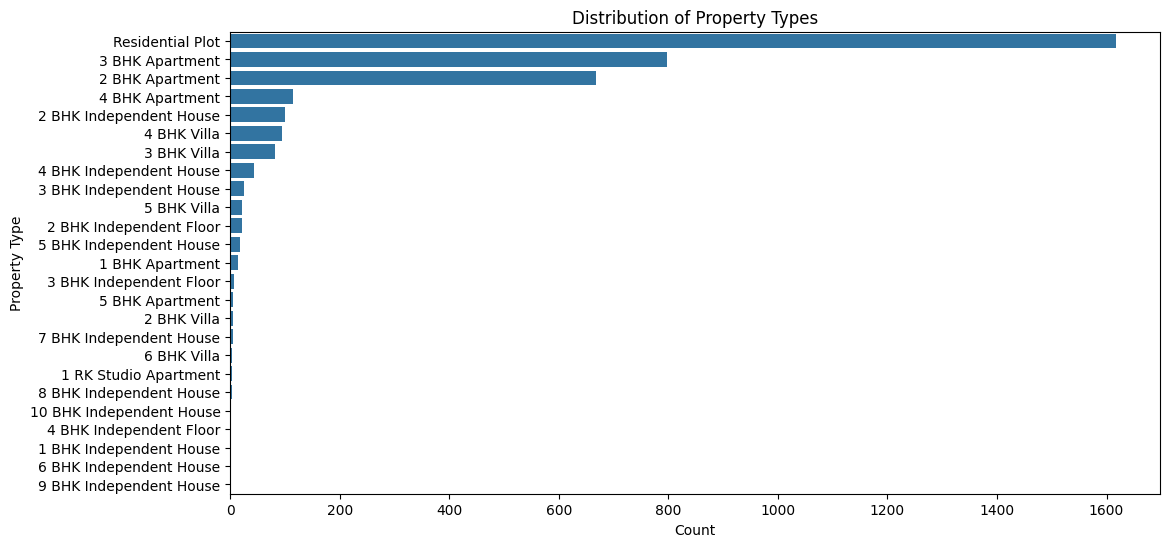

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(y='title', data=data, order=data['title'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

### 2. Price Distribution

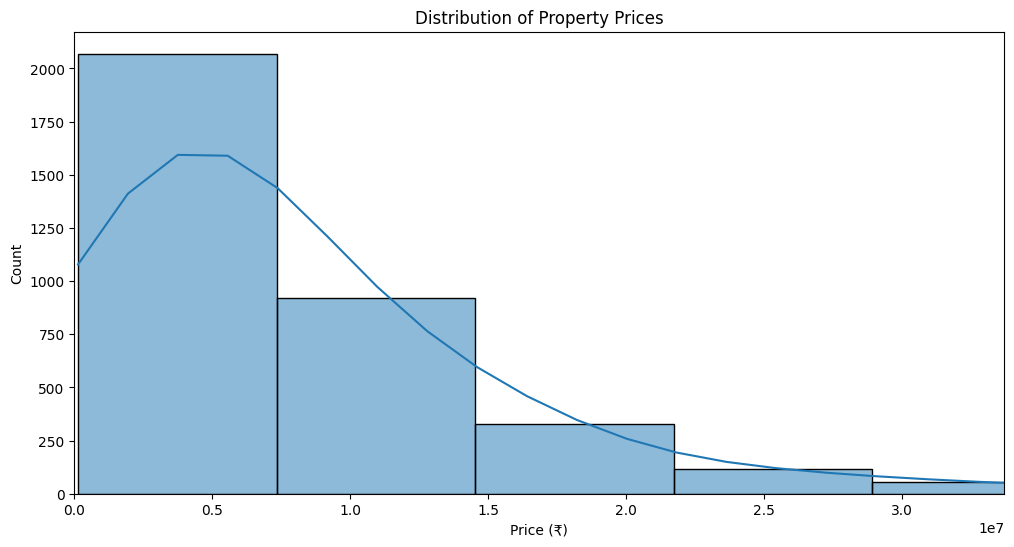

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.xlim(0, data['price'].quantile(0.95)) # Exclude extreme outliers
plt.show()

### 3. Area Distribution

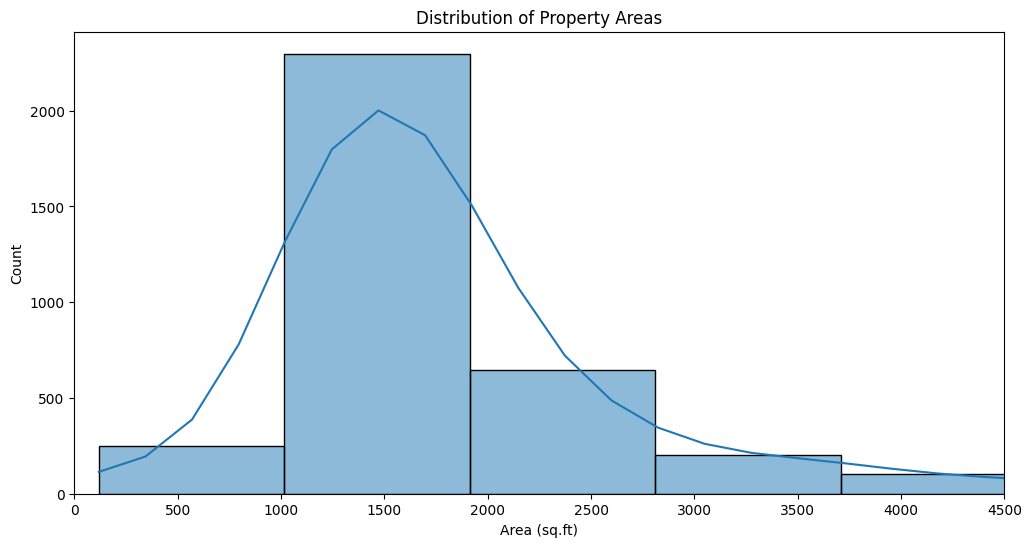

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(data['area_insqft'], bins=50, kde=True)
plt.title('Distribution of Property Areas')
plt.xlabel('Area (sq.ft)')
plt.ylabel('Count')
plt.xlim(0, data['area_insqft'].quantile(0.95)) # Exclude extreme outliers
plt.show()

# Bivariate Analysis

### 1. Price vs Area

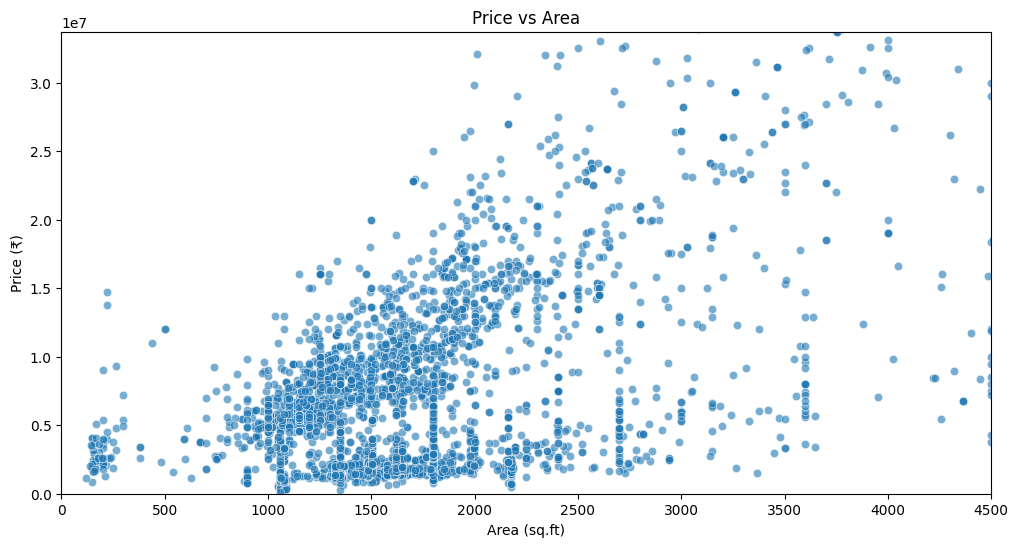

In [56]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='area_insqft', y='price', data=data, alpha=0.6)
plt.title('Price vs Area')
plt.xlabel('Area (sq.ft)')
plt.ylabel('Price (₹)')
plt.ylim(0, data['price'].quantile(0.95))
plt.xlim(0, data['area_insqft'].quantile(0.95))
plt.show()

### 2. Average Price by Property Type

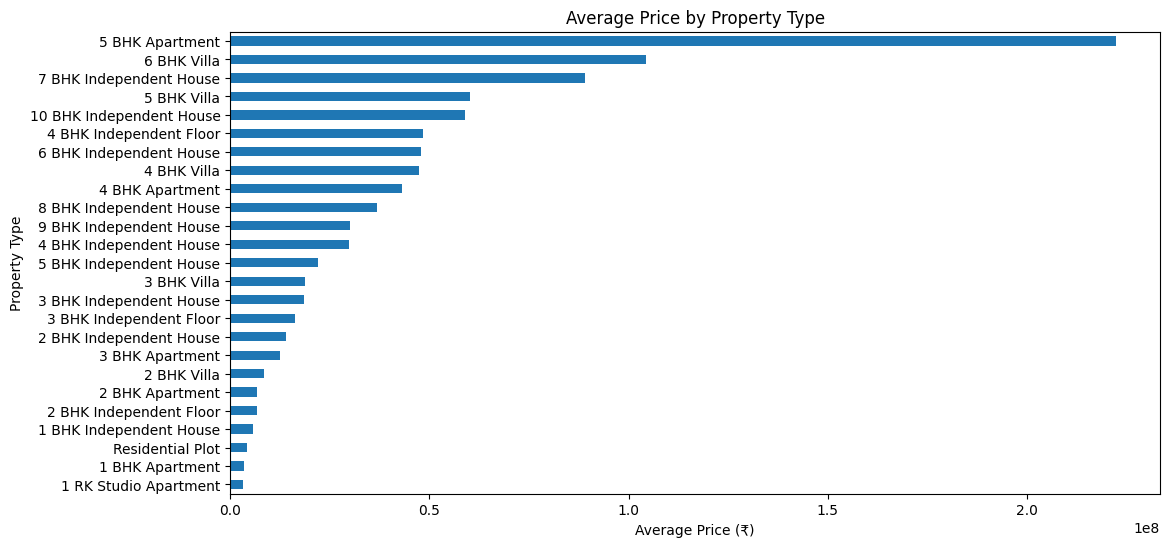

In [57]:
plt.figure(figsize=(12,6))
data.groupby('title')['price'].mean().sort_values().plot(kind='barh')
plt.title('Average Price by Property Type')
plt.xlabel('Average Price (₹)')
plt.ylabel('Property Type')
plt.show()

#  Location Analysis

### 1. Top 20 Locations by Property Count

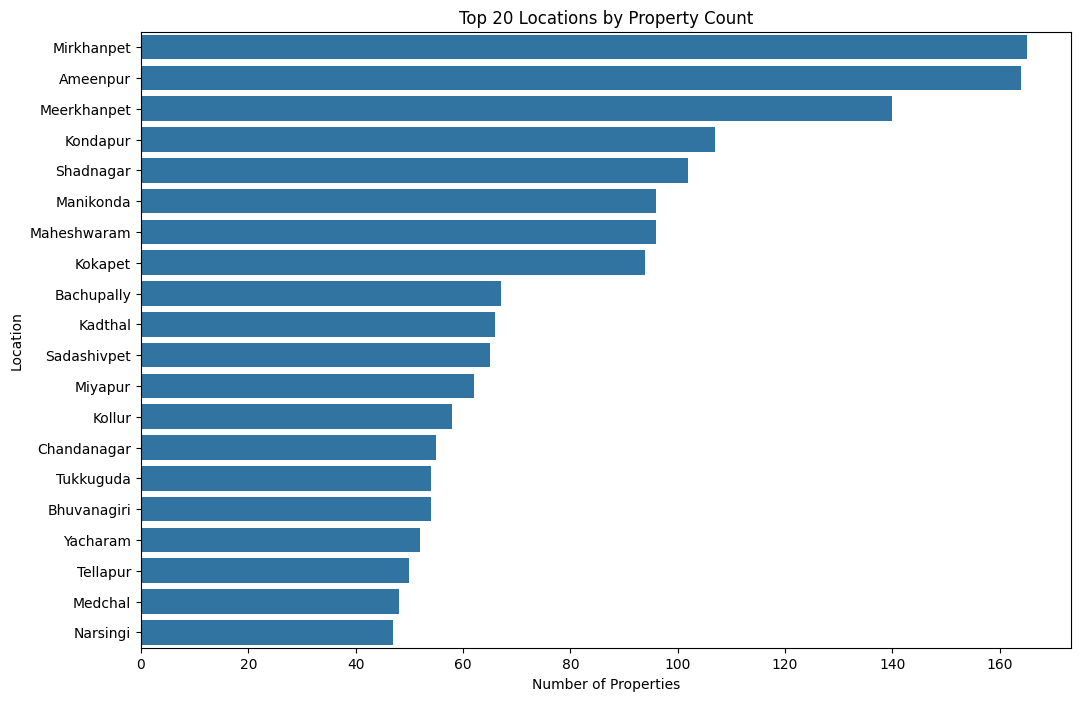

In [58]:
plt.figure(figsize=(12,8))
top_locations = data['location'].value_counts().head(20)
sns.barplot(y=top_locations.index, x=top_locations.values)
plt.title('Top 20 Locations by Property Count')
plt.xlabel('Number of Properties')
plt.ylabel('Location')
plt.show()

### 2. Price Distribution by Top Locations

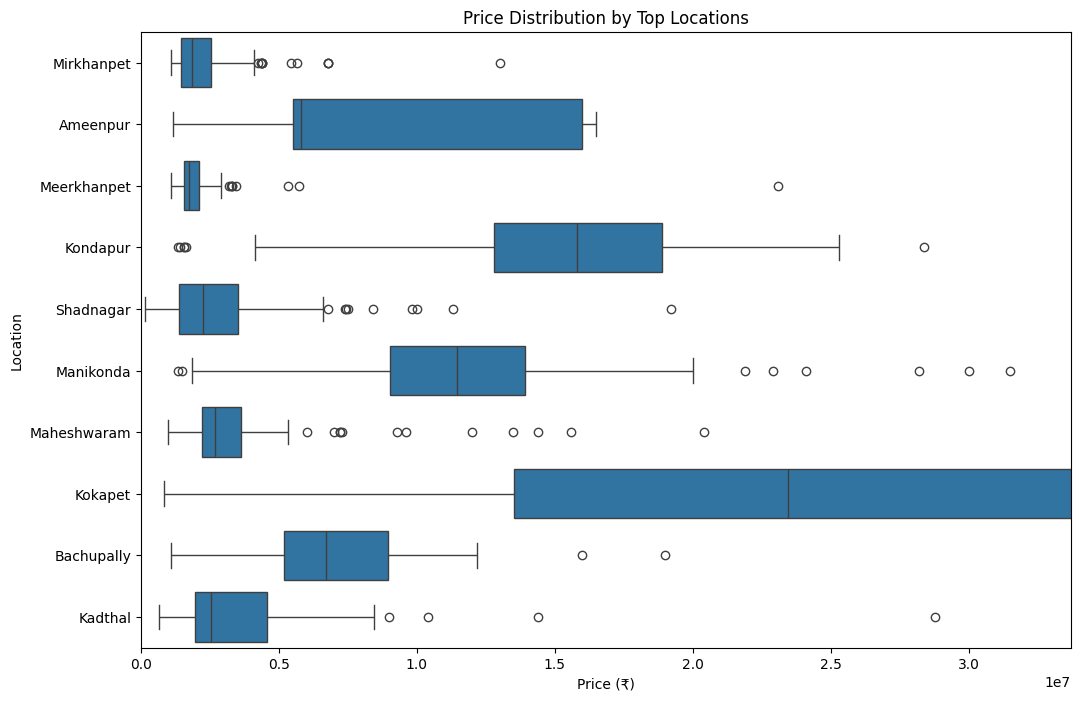

In [59]:
top_10_locations = data['location'].value_counts().head(10).index
plt.figure(figsize=(12,8))
sns.boxplot(y='location', x='price', 
            data=data[data['location'].isin(top_10_locations)],
            order=top_10_locations)
plt.title('Price Distribution by Top Locations')
plt.xlabel('Price (₹)')
plt.ylabel('Location')
plt.xlim(0, data['price'].quantile(0.95))
plt.show()

# Building Status Analysis

###  Price Distribution by Building Status

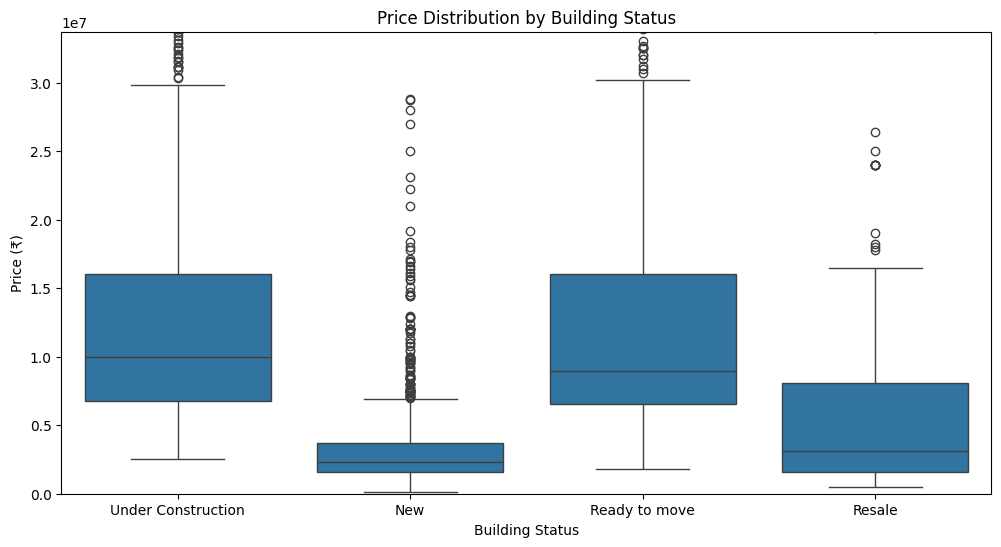

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(x='building_status', y='price', data=data)
plt.title('Price Distribution by Building Status')
plt.ylabel('Price (₹)')
plt.xlabel('Building Status')
plt.ylim(0, data['price'].quantile(0.95))
plt.show()

# Price per Sq.Ft Analysis

### Price per Sq.Ft Distribution

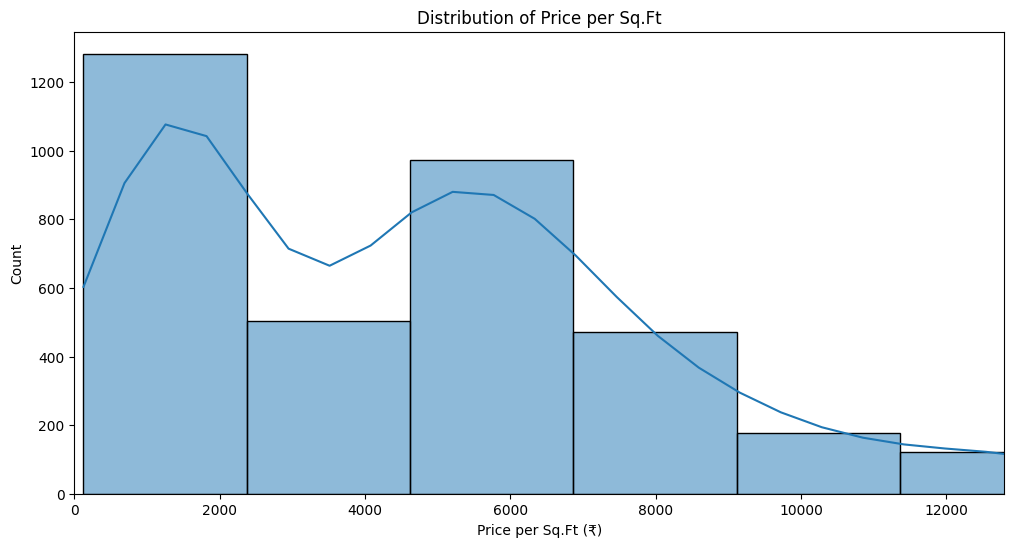

In [61]:
plt.figure(figsize=(12,6))
sns.histplot(data['price_per_sqft'], bins=50, kde=True)
plt.title('Distribution of Price per Sq.Ft')
plt.xlabel('Price per Sq.Ft (₹)')
plt.ylabel('Count')
plt.xlim(0, data['price_per_sqft'].quantile(0.95))
plt.show()

# STEP 5 : Get count of properties per location

In [62]:

location_counts = data['location'].value_counts()

print(f"Total unique locations: {len(location_counts)}")
print("\nProperties per location:")
print(location_counts)

Total unique locations: 359

Properties per location:
location
Mirkhanpet            165
Ameenpur              164
Meerkhanpet           140
Kondapur              107
Shadnagar             102
                     ... 
Sita Meadows            1
Mallepally              1
Jawahar nagar           1
Begum Bazar Chatri      1
Rajeev Nagar            1
Name: count, Length: 359, dtype: int64


In [63]:
data.drop(data.columns[0], axis=1, inplace=True, errors='ignore')
data.dropna(inplace=True)

# STEP 6 : Feature engineering

In [64]:

data['price_per_sqft'] = data['price(L)'] * 100000 / data['area_insqft']  # Convert price to rupees and calculate per sqft


# STEP 7 : Convert categorical variables

In [65]:

categorical_cols = ['title', 'location', 'building_status']
numerical_cols = ['rate_persqft', 'area_insqft']

# STEP 8 : Random Forest model

In [66]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

## Predictions

In [67]:

rf_predictions = rf_model.predict(X_test_processed)

## Evaluation

In [68]:

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

In [69]:
print("Random Forest Performance:")
print(f"MAE: {rf_mae:,.2f}")
print(f"MSE: {rf_mse:,.2f}")
print(f"RMSE: {rf_rmse:,.2f}")
print(f"R² Score: {rf_r2:.4f}")

Random Forest Performance:
MAE: 629,179.27
MSE: 19,911,524,559,047.23
RMSE: 4,462,233.14
R² Score: 0.9476


# STEP 9 : Linear Regression model

In [70]:

lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

LinearRegression()

## Predictions

In [71]:

lr_predictions = lr_model.predict(X_test_processed)

## Evaluation

In [72]:

lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)

In [73]:
print("\nLinear Regression Performance:")
print(f"MAE: {lr_mae:,.2f}")
print(f"MSE: {lr_mse:,.2f}")
print(f"RMSE: {lr_rmse:,.2f}")
print(f"R² Score: {lr_r2:.4f}")


Linear Regression Performance:
MAE: 3,798,044.98
MSE: 85,642,229,711,146.75
RMSE: 9,254,308.71
R² Score: 0.7744


In [74]:
# For Random Forest
feature_names = (numerical_cols + 
                 list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)))
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))


Top 10 Important Features:
                     Feature  Importance
0               rate_persqft    0.512509
1                area_insqft    0.432950
26    title_Residential Plot    0.019907
18     title_5 BHK Apartment    0.007213
162   location_Jubilee Hills    0.006987
358      building_status_New    0.003839
22         title_6 BHK Villa    0.003384
59    location_Banjara Hills    0.001941
176         location_Kokapet    0.001585
201  location_Mahendra Hills    0.001343


# STEP 10 : RESULT 

In [75]:

# Assuming `data` is your DataFrame
# Define numerical and categorical columns
numerical_cols = ['rate_persqft', 'area_insqft']
categorical_cols = ['title', 'location', 'building_status']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Prepare features and target
X = data[['title', 'location', 'building_status', 'rate_persqft', 'area_insqft']]
y = data['price(L)'] * 100000  # Convert price to rupees

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)


# Prediction function
def predict_price(property_type, location, building_status, rate_per_sqft, area):
    """Predict property price using the best model"""
    input_data = pd.DataFrame({
        'title': [property_type],
        'location': [location],
        'building_status': [building_status],
        'rate_persqft': [rate_per_sqft],
        'area_insqft': [area]
    })
    
    processed_input = preprocessor.transform(input_data)
    prediction = rf_model.predict(processed_input)[0]
    return prediction

# Example usage
predicted_price = predict_price(
    property_type="Residential Plot",
    location="Kukatpally",
    building_status="Resale",
    rate_per_sqft=4000,
    area=2365
)

print(f"\nPredicted Price: ₹{predicted_price:,.2f}")


Predicted Price: ₹9,390,610.00


# STEP 11 : Save the model and preprocessor

In [76]:
import joblib


joblib.dump(rf_model, 'house_price_rf_model.joblib')
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']